In [2]:
import os
import tensorflow as tf
tf.reset_default_graph()
import numpy as np
from matplotlib import pyplot as plt
import png

from models.particular import MODEL_FILE
from mnist import test_batcher as batcher

/Users/wgiersche/Project-Ellie/capsnet-fashion/venv/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
batch_size=10000
with tf.Session() as sess:
    from models.particular import dense_4_layers
    model = dense_4_layers()
    saver = tf.train.Saver()
    saver.restore(sess, MODEL_FILE)
    batcher.reset()
    img, lbls = batcher.next_batch(batch_size)
    img = img.reshape(-1, 784)
    lbls = np.int32(lbls)
    inference = sess.run(model.activation, feed_dict={model.samples: img})
    predicted = np.argmax(inference, axis=1)
    failed = (1 - np.equal( predicted, lbls)) * range(batch_size)

INFO:tensorflow:Restoring parameters from /var/ellie/models/mnist/model.ckpt


In [4]:
failed_indices=[i for i in filter(lambda x: x>0, failed)]

In [5]:
failed_indices[0:10]

[149, 247, 321, 381, 445, 449, 495, 582, 659, 691]

In [6]:
idx = 247
record = {"index": idx, "lbl": lbls[idx], "pred": predicted[idx]} 

In [7]:
failed_records=[{"index": idx, "lbl": lbls[idx], "pred": predicted[idx]} 
                for idx in filter(lambda x: x>0, failed)]
len(failed_records)

200

In [8]:
failed_records[5]

{'index': 449, 'lbl': 3, 'pred': 5}

In [9]:
dir='app/images'
for img in os.listdir(dir):
    path = os.path.join(dir, img)
    try:
        if os.path.isfile(path):
            os.unlink(path)
    except Exception as e:
        print(e)

{'index': 1014, 'lbl': 6, 'pred': 5}
{'index': 1112, 'lbl': 4, 'pred': 6}
{'index': 1128, 'lbl': 3, 'pred': 7}
{'index': 1166, 'lbl': 3, 'pred': 5}
{'index': 1178, 'lbl': 4, 'pred': 0}
{'index': 1192, 'lbl': 9, 'pred': 4}
{'index': 1226, 'lbl': 7, 'pred': 2}
{'index': 1232, 'lbl': 9, 'pred': 4}
{'index': 1242, 'lbl': 4, 'pred': 9}
{'index': 1247, 'lbl': 9, 'pred': 5}
{'index': 1260, 'lbl': 7, 'pred': 1}
{'index': 1299, 'lbl': 5, 'pred': 7}
{'index': 1319, 'lbl': 8, 'pred': 3}
{'index': 1393, 'lbl': 5, 'pred': 3}
{'index': 1414, 'lbl': 9, 'pred': 7}
{'index': 1425, 'lbl': 8, 'pred': 4}


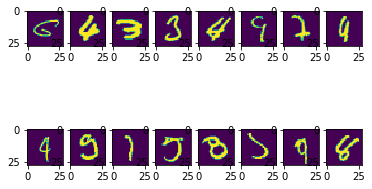

In [13]:
batcher.reset()
imgs, _ = batcher.next_batch(10000)
f, arr = plt.subplots(2,8)
for row in (0, 1):
    for col in range(8):
        i = 8 * row + col
        record = failed_records[i+16]
        print(record)
        img = imgs[record["index"]]        
        arr[row, col].imshow(img)
        

In [11]:
from services.predictions.mnist_prediction import MnistPredictionService
mnist_service = MnistPredictionService()
mnist_service.list_failed(10000)

INFO:tensorflow:Restoring parameters from /var/ellie/models/mnist/model.ckpt


[{'index': 149, 'lbl': 2, 'pred': 4},
 {'index': 247, 'lbl': 4, 'pred': 2},
 {'index': 321, 'lbl': 2, 'pred': 7},
 {'index': 381, 'lbl': 3, 'pred': 7},
 {'index': 445, 'lbl': 6, 'pred': 0},
 {'index': 449, 'lbl': 3, 'pred': 5},
 {'index': 495, 'lbl': 8, 'pred': 0},
 {'index': 582, 'lbl': 8, 'pred': 2},
 {'index': 659, 'lbl': 2, 'pred': 1},
 {'index': 691, 'lbl': 8, 'pred': 4},
 {'index': 844, 'lbl': 8, 'pred': 7},
 {'index': 882, 'lbl': 9, 'pred': 7},
 {'index': 924, 'lbl': 2, 'pred': 7},
 {'index': 947, 'lbl': 8, 'pred': 9},
 {'index': 951, 'lbl': 5, 'pred': 7},
 {'index': 956, 'lbl': 1, 'pred': 2},
 {'index': 1014, 'lbl': 6, 'pred': 5},
 {'index': 1112, 'lbl': 4, 'pred': 6},
 {'index': 1128, 'lbl': 3, 'pred': 7},
 {'index': 1166, 'lbl': 3, 'pred': 5},
 {'index': 1178, 'lbl': 4, 'pred': 0},
 {'index': 1192, 'lbl': 9, 'pred': 4},
 {'index': 1226, 'lbl': 7, 'pred': 2},
 {'index': 1232, 'lbl': 9, 'pred': 4},
 {'index': 1242, 'lbl': 4, 'pred': 9},
 {'index': 1247, 'lbl': 9, 'pred': 5},
 {

In [12]:
mnist_service.create_failed_pngs(10000)

INFO:tensorflow:Restoring parameters from /var/ellie/models/mnist/model.ckpt


In [3]:
mnist_service.clean_img_dir()